In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
sales = np.random.randint(50, 500, size=len(date_range))

data = {
    'Tanggal': date_range,
    'Penjualan': sales
}

df = pd.DataFrame(data)
print("Dataset:")
print(df.head())

Dataset:
     Tanggal  Penjualan
0 2023-01-01        152
1 2023-01-02        485
2 2023-01-03        398
3 2023-01-04        320
4 2023-01-05        156


In [2]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

df['Tahun'] = df['Tanggal'].dt.year
df['Bulan'] = df['Tanggal'].dt.month
df['Hari'] = df['Tanggal'].dt.day

print("\nDataset dengan Komponen Waktu:")
print(df.head())


Dataset dengan Komponen Waktu:
     Tanggal  Penjualan  Tahun  Bulan  Hari
0 2023-01-01        152   2023      1     1
1 2023-01-02        485   2023      1     2
2 2023-01-03        398   2023      1     3
3 2023-01-04        320   2023      1     4
4 2023-01-05        156   2023      1     5


In [3]:
monthly_sales = df.groupby('Bulan')['Penjualan'].sum()

print("\nTotal Penjualan Bulanan:")
print(monthly_sales)


Total Penjualan Bulanan:
Bulan
1      8607
2      7405
3      9058
4      8812
5      8008
6      8360
7      7724
8      9274
9      7597
10    10071
11     7885
12     9055
Name: Penjualan, dtype: int32


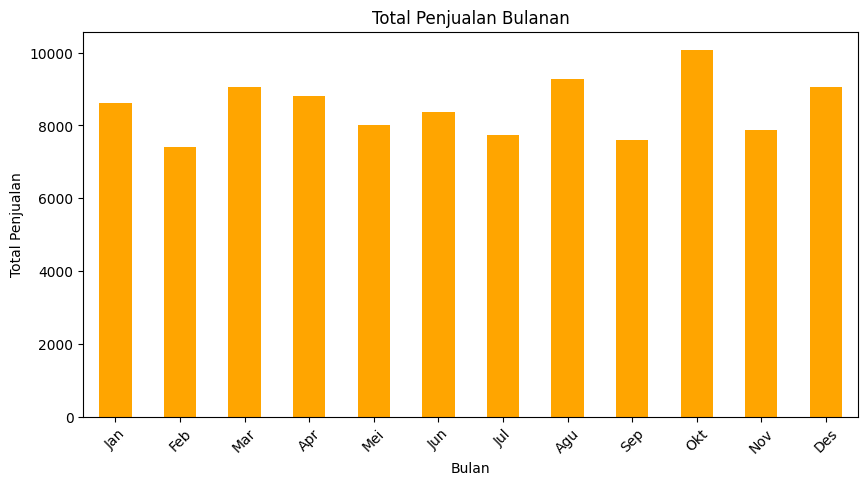

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='orange')
plt.title('Total Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.savefig('19_01.png', format='png', dpi=300)
plt.show()

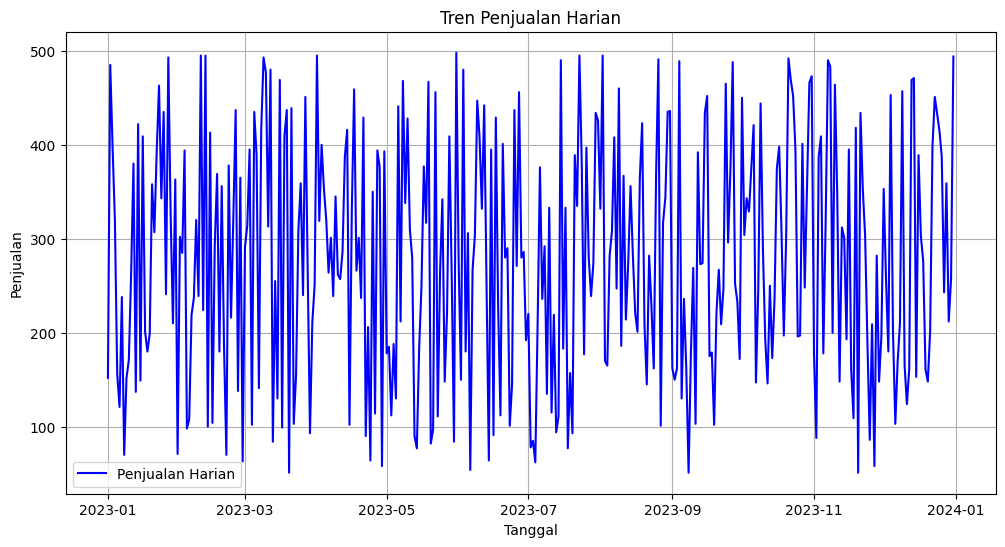

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Penjualan'], label='Penjualan Harian', color='blue')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.grid()
plt.savefig('19_02.png', format='png', dpi=300)
plt.show()

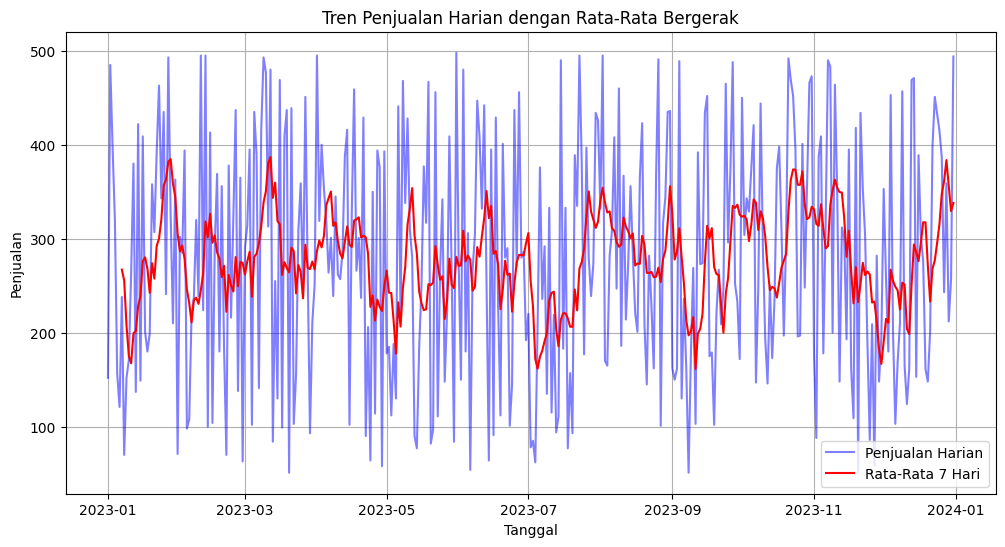

In [6]:
df['Rolling 7 Hari'] = df['Penjualan'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Tanggal'], df['Penjualan'], label='Penjualan Harian', color='blue', alpha=0.5)
plt.plot(df['Tanggal'], df['Rolling 7 Hari'], label='Rata-Rata 7 Hari', color='red')
plt.title('Tren Penjualan Harian dengan Rata-Rata Bergerak')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.grid()
plt.savefig('19_03.png', format='png', dpi=300)
plt.show()